Importing Required Modules

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Importing Dataset

In [61]:
iris_df = pd.read_csv('/home/manodharshan/Documents/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
x = iris_df.drop('Species', axis = 1)

In [63]:
x.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]>

In [64]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [65]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
print("Species Counts")
iris_df["Species"].value_counts()

Species Counts


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Visualizing The Dataset

In [67]:
#Correlation
corr_ = x.corr()
corr_

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

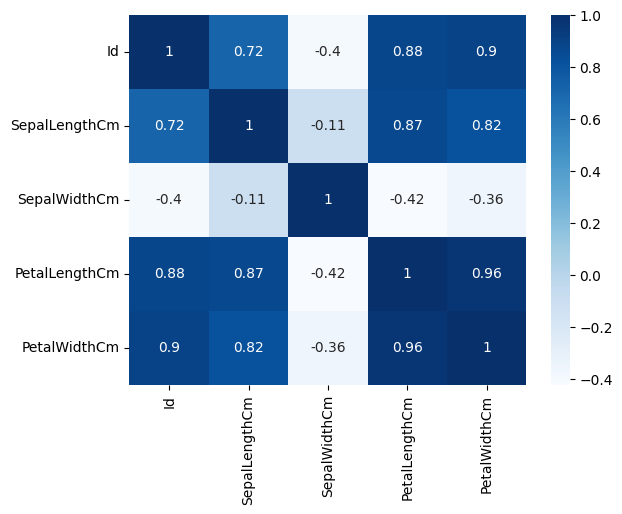

In [68]:
sns.heatmap(corr_, cmap="Blues", annot=True)

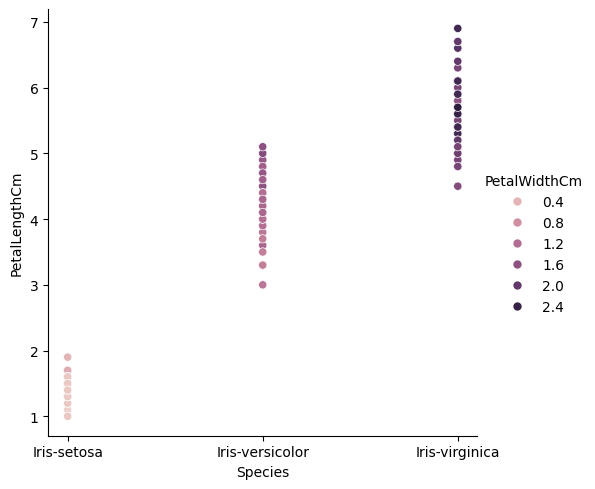

In [69]:
sns.relplot(x = "Species", y = "PetalLengthCm",hue = "PetalWidthCm", data = iris_df)
plt.show()

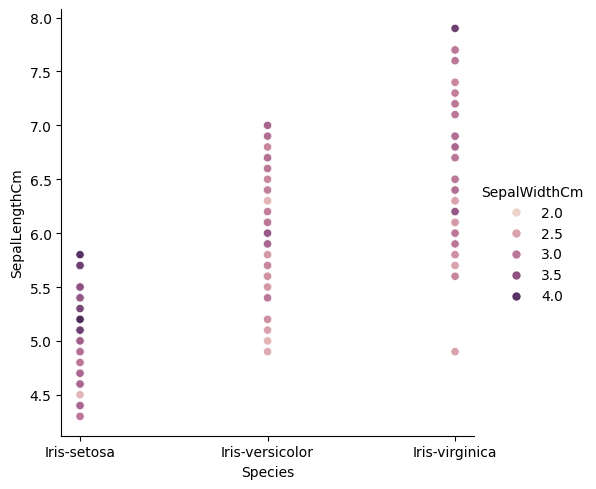

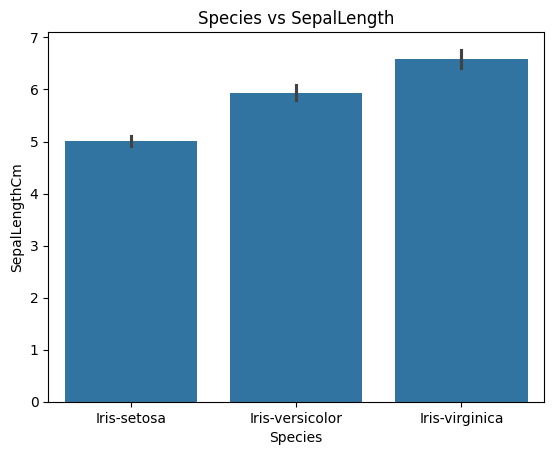

In [70]:
sns.relplot(x = "Species", y = "SepalLengthCm", hue = "SepalWidthCm", data = iris_df)
plt.show()
sns.barplot(x = "Species", y = "SepalLengthCm", data=iris_df)
plt.title("Species vs SepalLength")
plt.show()


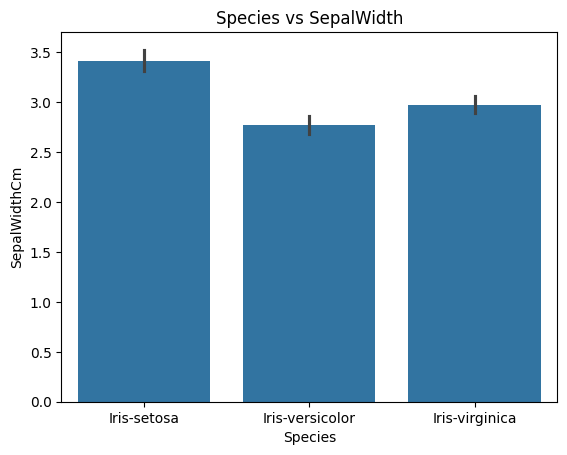

In [71]:
sns.barplot(x = "Species", y = "SepalWidthCm", data=iris_df)
plt.title("Species vs SepalWidth")
plt.show()

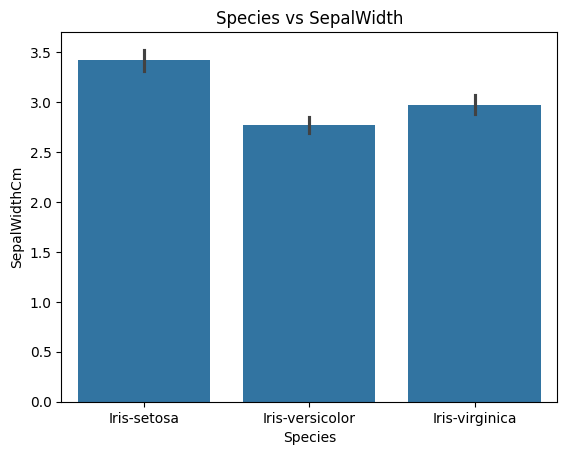

In [72]:
sns.barplot(x = "Species", y = "SepalWidthCm", data=iris_df)
plt.title("Species vs SepalWidth")
plt.show()

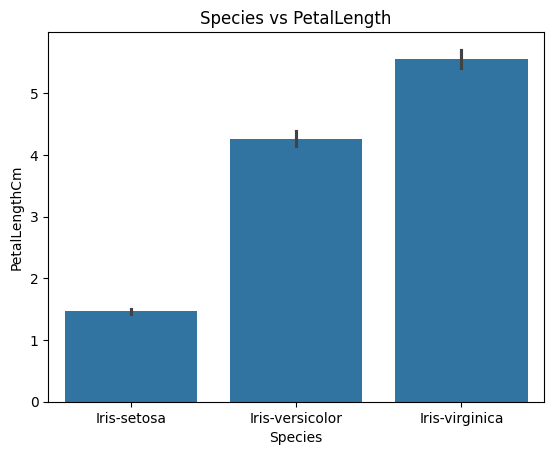

In [73]:
sns.barplot(x = "Species", y = "PetalLengthCm", data=iris_df)
plt.title("Species vs PetalLength")
plt.show()

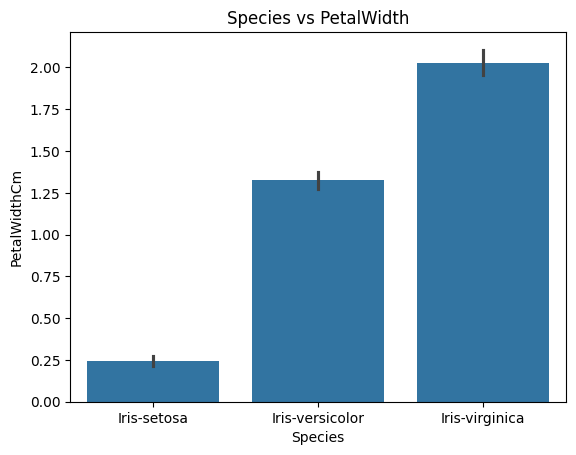

In [74]:
sns.barplot(x = "Species", y = "PetalWidthCm", data=iris_df)
plt.title("Species vs PetalWidth")
plt.show()

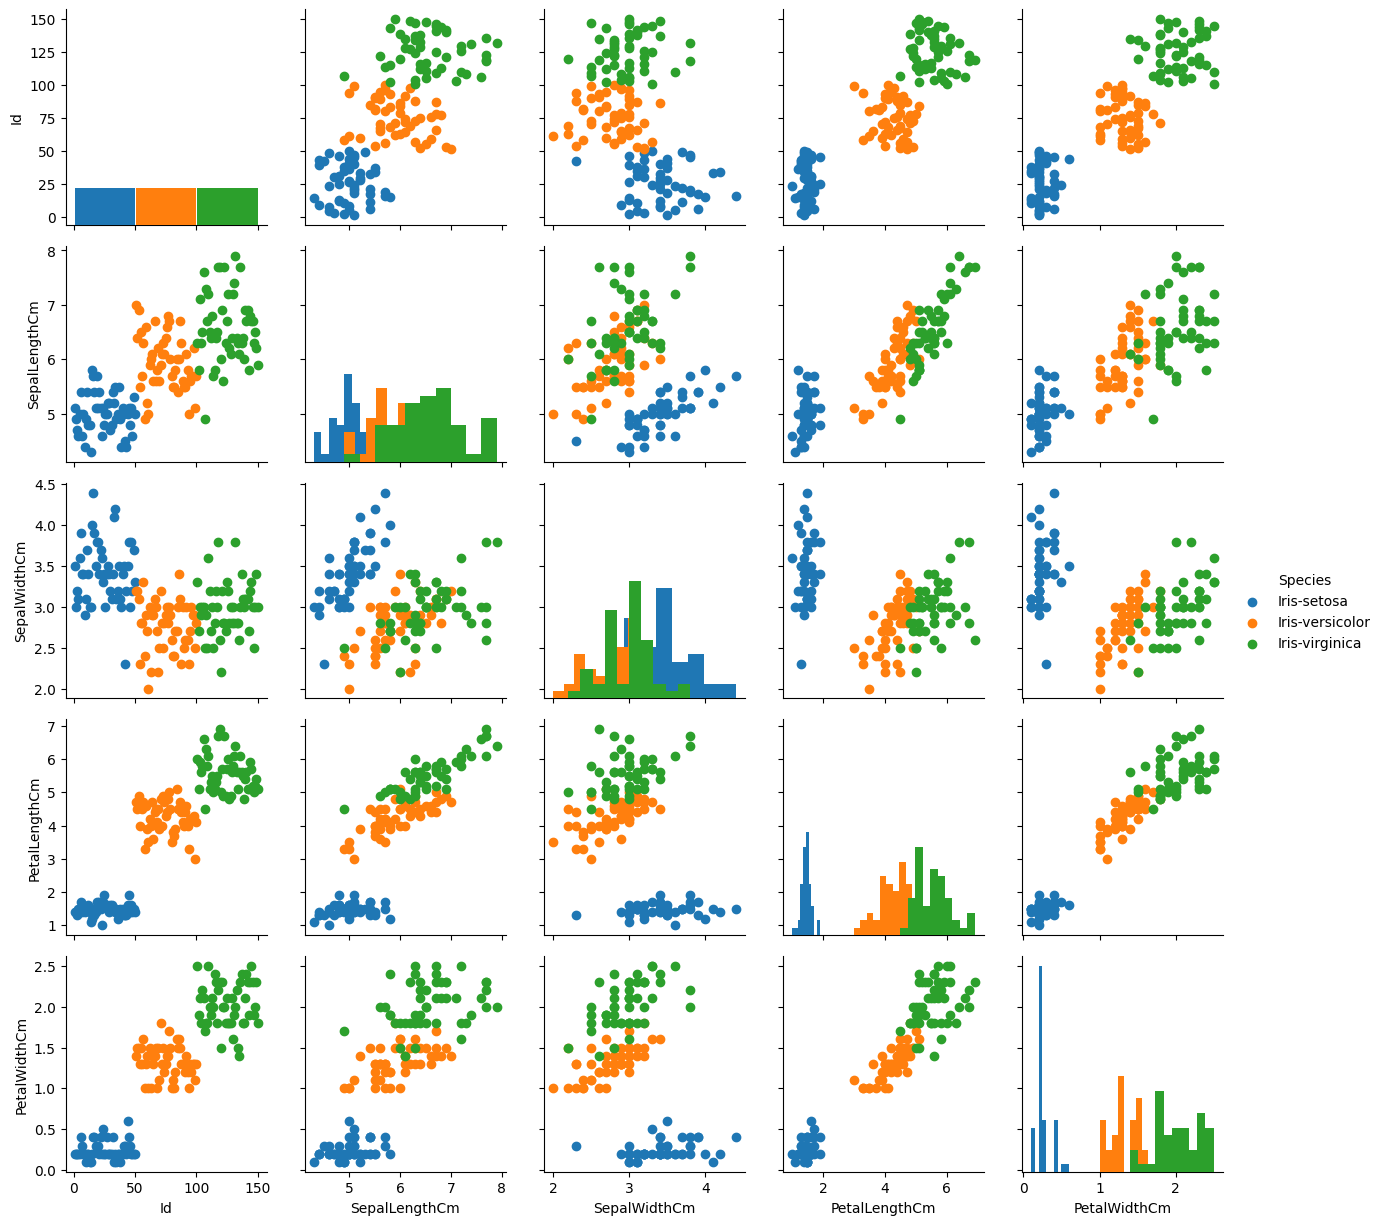

In [75]:
graph = sns.PairGrid(iris_df, hue = "Species")
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

Splitting The Dataset For Traning and Testing

In [76]:
X = iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = iris_df["Species"]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [78]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [79]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
99,5.7,2.8,4.1,1.3
32,5.2,4.1,1.5,0.1
73,6.1,2.8,4.7,1.2
106,4.9,2.5,4.5,1.7
110,6.5,3.2,5.1,2.0
...,...,...,...,...
8,4.4,2.9,1.4,0.2
3,4.6,3.1,1.5,0.2
98,5.1,2.5,3.0,1.1
62,6.0,2.2,4.0,1.0


In [80]:
Y_train

99     Iris-versicolor
32         Iris-setosa
73     Iris-versicolor
106     Iris-virginica
110     Iris-virginica
            ...       
8          Iris-setosa
3          Iris-setosa
98     Iris-versicolor
62     Iris-versicolor
85     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [81]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
26,5.0,3.4,1.6,0.4
91,6.1,3.0,4.6,1.4
22,4.6,3.6,1.0,0.2
101,5.8,2.7,5.1,1.9
116,6.5,3.0,5.5,1.8
40,5.0,3.5,1.3,0.3
94,5.6,2.7,4.2,1.3
113,5.7,2.5,5.0,2.0
30,4.8,3.1,1.6,0.2
55,5.7,2.8,4.5,1.3


In [82]:
Y_test

26         Iris-setosa
91     Iris-versicolor
22         Iris-setosa
101     Iris-virginica
116     Iris-virginica
40         Iris-setosa
94     Iris-versicolor
113     Iris-virginica
30         Iris-setosa
55     Iris-versicolor
90     Iris-versicolor
97     Iris-versicolor
12         Iris-setosa
54     Iris-versicolor
35         Iris-setosa
56     Iris-versicolor
6          Iris-setosa
69     Iris-versicolor
112     Iris-virginica
16         Iris-setosa
131     Iris-virginica
33         Iris-setosa
70     Iris-versicolor
92     Iris-versicolor
34         Iris-setosa
118     Iris-virginica
42         Iris-setosa
136     Iris-virginica
64     Iris-versicolor
95     Iris-versicolor
Name: Species, dtype: object

SUPPORT VECTOR CLASSIFIER

In [83]:
from sklearn.svm import SVC
svc_model = SVC().fit(X_train, Y_train)

predictions = svc_model.predict(X)
df = {"Actual":Y,"Predicted":predictions}
pd.DataFrame(df)

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [84]:
y_hat = svc_model.predict(X_test)

#Classification Report Using SVC model
print("\t\t  CLASSIFICATION REPORT")
print("="*64)
print(classification_report(Y_test, y_hat))
print("="*64)

		  CLASSIFICATION REPORT
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Confusion Matrix
 [[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]


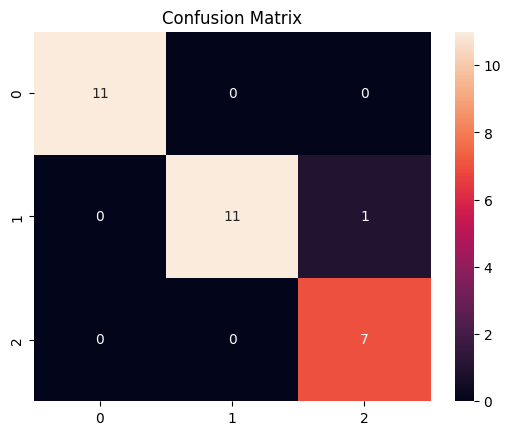

In [85]:
#Confusion Matrix Using SVC model
cm = confusion_matrix(Y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

Accuracy of the SVC model

In [86]:
print("Accuracy Of the Support Vector Classifier Model\n",accuracy_score(Y_test, y_hat)*100,'%')

Accuracy Of the Support Vector Classifier Model
 96.66666666666667 %
